In [126]:
%matplotlib inline
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [127]:
# City File csv read 
city_load = pd.read_csv("city_data.csv")
cityfile=pd.DataFrame(city_load)
#cityfile.head()

In [128]:
# Ride File csv read 
ride_load = pd.read_csv("ride_data.csv")
ridefile=pd.DataFrame(ride_load)
#ridefile.head()

In [129]:
#Combine the data into a single dataset
combined_cityride = pd.merge(city_load, ride_load, on="city")
#combined_cityride.head()


In [130]:
#Column info
columns = combined_cityride.columns
columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [131]:
#Datatype info
datatype = combined_cityride.dtypes
datatype

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [132]:
#Number of cities identified
unqcities= len(combined_cityride["city"].unique())
unqcities

120

In [133]:
#Number of types identified
unqtype= len(combined_cityride["type"].unique())
unqtype

3

In [134]:
# The unique method shows every element of type series that appears only once
chk_type = combined_cityride["type"].unique()
chk_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [143]:
#Subselect on type - Urban
Urban_data=combined_cityride.loc[(combined_cityride["type"] =="Urban")];
#Identify cities under Urban type
Urbancity_data=Urban_data.groupby('city')
#Urban_data.head()
x_uaxis=Urbancity_data['ride_id'].count()
#x_uaxis
y_uaxis=Urbancity_data['fare'].mean()
#y_uaxis
z_uaxis=Urbancity_data['driver_count'].value_counts()
#z_uaxis

In [144]:
#Subselect on type - Suburban
Suburban_data=combined_cityride.loc[(combined_cityride["type"] =="Suburban")];
#Identify cities under suburban type
Suburbancity_data=Suburban_data.groupby('city')
#Urban_data.head()
x_saxis=Suburbancity_data['ride_id'].count()
#x_axis
y_saxis=Suburbancity_data['fare'].mean()
#y_uaxis
z_saxis=Suburbancity_data['driver_count'].value_counts()
#z_uaxis

In [145]:
#Subselect on type - Rural
Rural_data=combined_cityride.loc[(combined_cityride["type"] =="Rural")];
#Identify cities under rural type
Ruralcity_data=Rural_data.groupby('city')
#Urban_data.head()
x_raxis=Ruralcity_data['ride_id'].count()
#x_axis
y_raxis=Ruralcity_data['fare'].mean()
#y_uaxis
z_raxis=Ruralcity_data['driver_count'].value_counts()
#z_uaxis

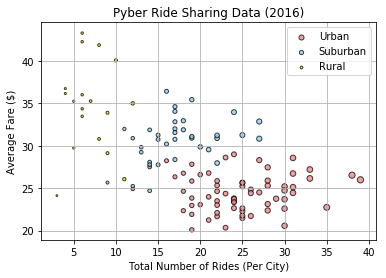

In [153]:
#Build the scatter plots for each type
plt.scatter(x_uaxis, y_uaxis, marker="o", facecolors="lightcoral", edgecolors="black",
            s=z_uaxis, alpha=0.75, label="Urban")
plt.scatter(x_saxis, y_saxis, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=z_saxis, alpha=0.75, label="Suburban")
plt.scatter(x_raxis, y_raxis, marker="o", facecolors="gold", edgecolors="black",
            s=z_raxis, alpha=0.75, label="Rural")


#Incorporate the other graph properties

# Create a legend 
plt.legend(loc="best")

# Set a grid on the plot
plt.grid()

# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Show the chart
plt.show()


In [156]:
#Save figure
plt.tight_layout()
plt.savefig("../Pyber/Ride Share Data Bubble plot.png")
#Getting a blank png file
plt.show()


<Figure size 432x288 with 0 Axes>

In [157]:
#Display the data table for preview

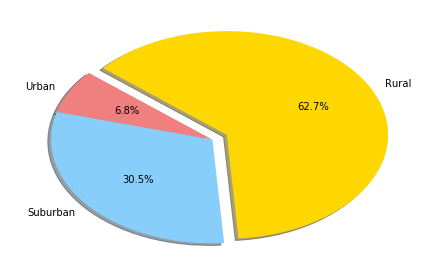

In [163]:
#Build Pie Chart for % of Total Fares by City Type
Total_Fares=combined_cityride.groupby('type')['fare'].sum()
#Total_Fares

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

plt.pie(Total_Fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.tight_layout()
plt.savefig("../Pyber/Total Fares by City Type PieChart.png")
#Getting a blank png file
plt.show()

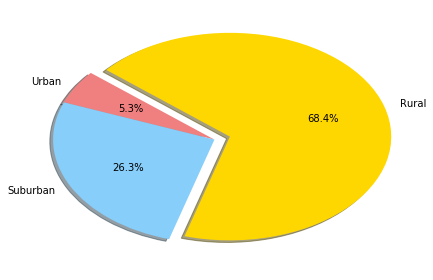

In [164]:
#Build Pie Chart for % of Total Rides by City Type
Total_Rides=combined_cityride.groupby('type')['ride_id'].count()
#Total_Rides

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

plt.pie(Total_Rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.tight_layout()
plt.savefig("../Pyber/Total Rides by City Type PieChart.png")
#Getting a blank png file
plt.show()

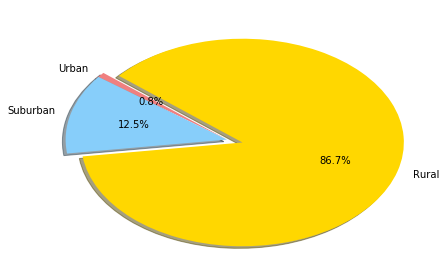

In [166]:
#Build Pie Chart for % of Total Drivers by City Type
Total_Drivers=combined_cityride.groupby('type')['driver_count'].sum()
#Total_Drivers

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

plt.pie(Total_Drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.tight_layout()
plt.savefig("../Pyber/Total Drivers by City Type PieChart.png")
#Getting a blank png file
plt.show()